# The World of TED

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time I begin watching TED Talks in high school, they have never ceased to amaze me. I have learned an incredible amount, about fields I was completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, I wanted to attempt at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions that I had always had in the back of my mind.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

In [112]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

The data has been obtained from the TED Dataset offered by Nikolaos Pappas and Andrei Popescu-Belis of Idiap Research Institute, Switzerland under the Creative Commons License. The datasets contain information about TED users and TED Talks uptil September 2012. It was used in the following papers:

* Nikolaos Pappas, Andrei Popescu-Belis, "Combining Semantic Content with User Preferences for TED Lecture Recommendation", 11th International Workshop on Content Based Multimedia Indexing, Veszprém, Hungary, IEEE, 2013 (http://publications.idiap.ch/downloads/papers/2013/Pappas_CBMI_2013.pdf)
* Nikolaos Pappas, Andrei Popescu-Belis, "Sentiment Analysis of User Comments for One-Class Collaborative Filtering over TED Talks", 36th ACM SIGIR Conference on Research and Development in Information Retrieval, Dublin, Ireland, ACM, 2013 (http://publications.idiap.ch/downloads/papers/2013/Pappas_SIGIR_2013.pdf)

## TED Users

We will first look into the data we have about TED Users. This dataset gives us information about all the videos that have been 'favorited' by a particular user in the JSON format.

The data is pretty ugly in its current form and therefore, we wrangle it to make it more readable and analysis friendly and load this data into a Pandas dataframe for quick and potent analysis.

In [4]:
user_data = json.load((open('data/users.json')))

In [5]:
df = json_normalize(user_data, 'favorites', ['user_id'])
df.columns = ['talk', 'user']
user_dict = dict(pd.Series(df['user'].drop_duplicates().reset_index()['user']))
user_dict = {y:x for x,y in user_dict.items()}
df['user'] = df['user'].apply(lambda x: user_dict[x])
df.head()

,talk,user
0,"Graham Hill: Less stuff, more happiness",0
1,Adam Ostrow: After your final status update,0
2,Kevin Slavin: How algorithms shape our world,0
3,Terry Moore: How to tie your shoes,0
4,Arvind Gupta: Turning trash into toys for lear...,0


We now proceed to answer the following questions:
    
1. How many users were registered on TED.com in 2012?
2. How many times were videos favorited by users?
3. How many talks did each user view, on average?

In [6]:
num_users = df['user'].drop_duplicates().count()
num_users

12403

In [7]:
num_talks = df.shape[0]
num_talks

134533

In [8]:
avg_favorites = num_talks/num_users
avg_favorites

10.84681125534145

### Observations

There were **12,403 registered TED users** in September 2012 and the TED Talks have been favorited **134,533 times.**
On average, every registered user has favorited close to **11 videos**. 

A reasonable conclusion to arrive at would be that the average TED user has watched at least 11 TED Talks on the platform. Since the ratio of number of views to favorites is usually very high, it would be reasonable to assume that the number is much higher than 11 too.

Since TED Talks are usually **18 minutes** in length, this also implies that, on average, the registered user has watched at least **3 hours** of video. This indicates a very high engagement and retention level among registered users.

We only have data for users that have registered. One of the main incentives for users to register is to keep track of their **favorite videos** and **watch history**. It would be interesting to see if there is a cause-effect relationship here. That is, **only the most active users register since they have an incentive to keep track of their viewership**. It may be the case that the unregistered passive user is in the majority and has viewed a significantly smaller number of talks than the statistics show us.

### Favorite Talks

The next and the last question this dataset is capable of answering is the most popular vidoes among registered users. Let us proceed to answer this with the data on hand.

In [9]:
pop_talks = df.groupby('talk').count().sort_values('user', ascending=False)
pop_talks.head(25)

,user
talk,
Ken Robinson says schools kill creativity,2606
Jill Bolte Taylor's stroke of insight,1304
Elizabeth Gilbert: Your elusive creative genius,970
Sir Ken Robinson: Bring on the learning revolution!,935
Dan Gilbert: The surprising science of happiness,933
Simon Sinek: How great leaders inspire action,844
Hans Rosling: Stats that reshape your worldview,830
Barry Schwartz: The paradox of choice,808
Brené Brown: The power of vulnerability,764


Listed above are the 25 most popular talks of all time. Sir Ken Robinson's **'Do Schools Kill Creativity?'** tops the list  with 2606 upvotes and Jill Taylor's **Stroke of Insight** comes at a distant second.  Some speakers such as **Ken Robinson, Barry Schwartz and Hans Rosling** appear in this list more than once which indicate the popularity of the speaker as much as the theme and the content.

Let us visualise this data in the form of a bar plot of the 10 most popular talks of all time.

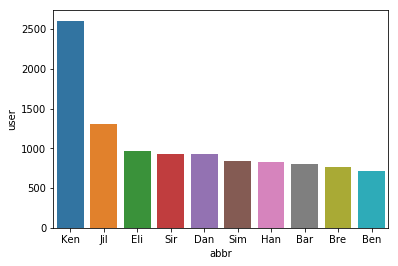

In [10]:
top_ten = pop_talks.head(10).reset_index()
top_ten['abbr'] = top_ten['talk'].apply(lambda x: x[:3])
sns.barplot(x='abbr', y='user', data=top_ten)

The visualisation gives us a picture of the **staggering popularity of Ken Robinson's talk**. Although Jill Taylor's talk rakes in only about half the upvotes as Robinson's, it still is significantly more popular than the rest of the top 10. The other talks in the top 10 have comparable number of views.

## TED Talks

With our preliminary analysis on TED User Preferences complete, we now turn our attention to the main dataset: TED Talks. This dataset gives us a plethora of information about all TED talks published until September 2012 including titles, descriptions, transcripts, themes and comments. As before, the data has been presented to us in the JSON format and thus has to be converted into a suitable format for analysis (namely, the Pandas dataframe).

In [11]:
talk_data = pd.read_json('data/talks.json')
talk_data['comments'] = talk_data['comments'].apply(lambda x: len(list(x)))
talk_data['id'] = talk_data.index
talk_data['description'] = talk_data['description'].apply(lambda x: str(list(x)[0]))
talk_data['title'] = talk_data['title'].apply(lambda x: str(list(x)[0]))
talk_data['views'] = talk_data['views'].apply(lambda x: int(list(x)[0].replace(',', '')))

In [12]:
talk_data.head()

,comments,description,film_date,id,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,transcript,url,views
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,"[Crime, Global issues, Government, Law, Memory...",[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025
1,43,Want to navigate the solar system without havi...,Dec 2011,1,Jun 2012,"[Demo, Exploration, Science, Software, Space, ...",[Peering into Space],[Carter Emmart demos a 3D atlas of the universe ],Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,"As a kid, I was fascinated with all things air...",http://www.ted.com/talks/jon_nguyen_tour_the_s...,220795
2,32,"During the hot summer months, watching an outd...",Apr 2012,2,Jun 2012,"[Entertainment, Environment, Global issues, In...","[Design That Matters, Presentation Innovation,...","[Peter Diamandis: Abundance is our future, Amy...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,Good evening. We are in this wonderful open-ai...,http://www.ted.com/talks/wolfgang_kessling_how...,230813
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,3,Jun 2012,"[Entertainment, Internet, Science, Web, Wikipe...","[Master Storytellers, How We Learn]","[Rives: A story of mixed emoticons, A.J. Jacob...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,"So, last month, the Encyclopaedia Britannica a...",http://www.ted.com/talks/rives_reinventing_the...,200203
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,4,Jun 2012,"[Creativity, Open-source, Robots, Technology]","[Tales of Invention, Art Unusual]",[Kate Hartman: The art of wearable communicati...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,"So a few weeks ago, a friend of mine gave this...",http://www.ted.com/talks/massimo_banzi_how_ard...,358737


The Related Tags, Related Themes and Related Videos are in a form that is not suitable for analysis. For the time being, we will leave it as it is and focus on the other features one by one.

### Comments

Although we have full content of all the comments posted on the TED website, we will refrain from performing any textual analysis and instead focus just on the number of comments posted. 

In [13]:
df2 = talk_data.copy()
df2.shape

(1203, 14)

In [14]:
df2['comments'].describe()

count    1203.000000
mean       97.685786
std       117.367843
min         7.000000
25%        44.000000
50%        70.000000
75%       115.500000
max      2284.000000
Name: comments, dtype: float64

We can summarize the following about comments:

* On average, every talk has about **97.6 comments.**
* There is a **huge standard deviation** associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers.
* The minimum number of comments on a talk is **7** and the maximum is **2284**. The **range is 2277.**

Let us also plot the distribution of the comments to see what it looks like.

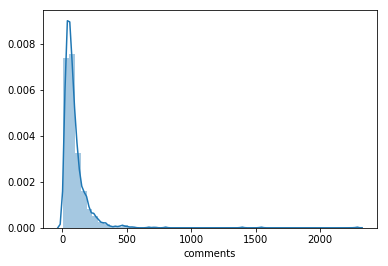

In [15]:
sns.distplot(df2['comments'])

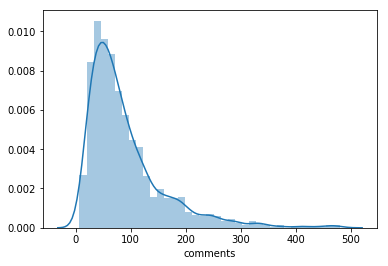

In [17]:
sns.distplot(df2[df2['comments'] < 500]['comments'])

From the plot above, we can see that the bulk of the talks have **fewer than 500 comments**. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is **only 1203 talks**.

Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

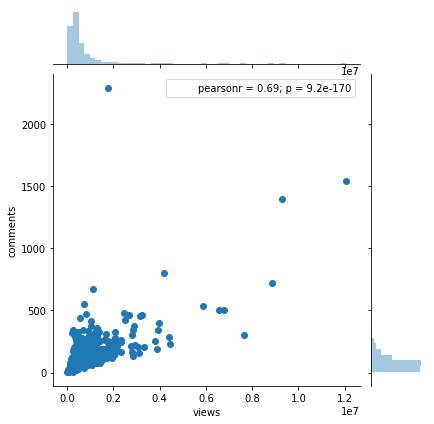

In [19]:
sns.jointplot(x='views', y='comments', data=df2)

In [20]:
df2[['views', 'comments']].corr()

,views,comments
views,1.000000,0.688491
comments,0.688491,1.000000


As the scatterplot and the correlation matrix shows, there is indeed a very strong correlation between these two quantities. Finally, let us check the number of views and comments on the 10 most commented TED Talks of all time.

In [21]:
df2[['title', 'speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,speaker,views,comments
187,Richard Dawkins: Militant atheism,Richard Dawkins,1763738,2284
37,Ken Robinson says schools kill creativity,Ken Robinson,12056699,1542
255,Jill Bolte Taylor's stroke of insight,Jill Bolte Taylor,9292536,1394
401,Elizabeth Gilbert: Your elusive creative genius,Elizabeth Gilbert,4195072,802
563,Pranav Mistry: The thrilling potential of Sixt...,Pranav Mistry,8838147,717
655,Sam Harris: Science can answer moral questions,Sam Harris,1137408,671
662,Michael Specter: The danger of science denial,Michael Specter,748519,553
809,Brené Brown: The power of vulnerability,Brené Brown,5873180,533
411,Pattie Maes and Pranav Mistry demo SixthSense,Pattie Maes,6586517,501
658,Simon Sinek: How great leaders inspire action,Simon Sinek,6782102,501


As can be seen above, Richard Dawkins' talk on **Militant Atheism'** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions.

Which talks tend to attract the largest amount of discussion?

To answer this question, we will define a new feature **discussion quotient** which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [22]:
df2['dis_quo'] = df2['comments']/df2['views']

In [23]:
df2[['title', 'speaker','views', 'comments', 'dis_quo']].sort_values('dis_quo', ascending=False).head(10)

,title,speaker,views,comments,dis_quo
115,Tom Honey on God and the tsunami,Tom Honey,235628,321,0.001362
803,Hanna Rosin: New data on the rise of women,Hanna Rosin,261570,342,0.001307
187,Richard Dawkins: Militant atheism,Richard Dawkins,1763738,2284,0.001295
495,Gordon Brown: Wiring a web for global good,Gordon Brown,362719,283,0.000780
27,Dan Dennett: Responding to Pastor Rick Warren,Dan Dennett,583437,440,0.000754
557,Mallika Sarabhai: Dance to change the world,Mallika Sarabhai,243307,183,0.000752
662,Michael Specter: The danger of science denial,Michael Specter,748519,553,0.000739
278,Billy Graham on technology and faith,Billy Graham,376211,265,0.000704
680,Rory Sutherland: Sweat the small stuff,Rory Sutherland,462173,325,0.000703
1199,Candy Chang: Before I die I want to...,Candy Chang,288782,198,0.000686


This analysis has actually raised extremely interesting insights. Half of the talks in the top 10 are on the lines of **Faith and Religion**. I suspect science and religion is still a very hotly debated topic even in the 21st century. We shall come back to this hypothesis in a later section.

### Analysing TED Talks by the month and the year

TED (especially TEDx) Talks tend to occur all throughout the year. Is there a hot month as far as TED is concerned? In other words, how are the talks distributed throughout the months since its inception? Let us find out.

In [24]:
df2['month'] = df2['film_date'].apply(lambda x: x.split()[0])

month_df = pd.DataFrame(df2['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']
month_df = month_df.drop(11)

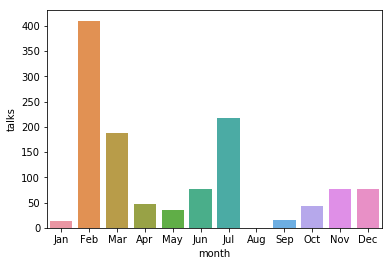

In [114]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

**February** is clearly the most popular month for TED Conferences whereas **August** is the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.

In [26]:
df_x = df2[df2['ted_event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

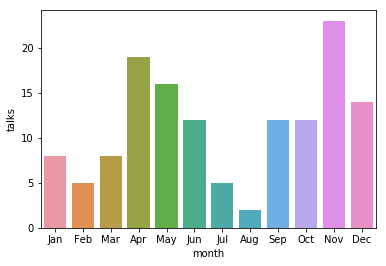

In [113]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

As far as TEDx talks are concerned, November is the most popular month. However, we cannot take this result at face value as very few of the TEDx talks are actually uploaded to the TED website and therefore, it is entirely possible that the sample in our dataset is not at all representative of all TEDx talks. A slightly more accurate statement would be that **the most popular TEDx talks take place the most in November and April.**

Let us now visualize the number of TED talks through the years and check if our hunch that they have grown significantly is indeed true.

In [28]:
df2['year'] = df2['film_date'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else np.nan)
year_df = pd.DataFrame(df2['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

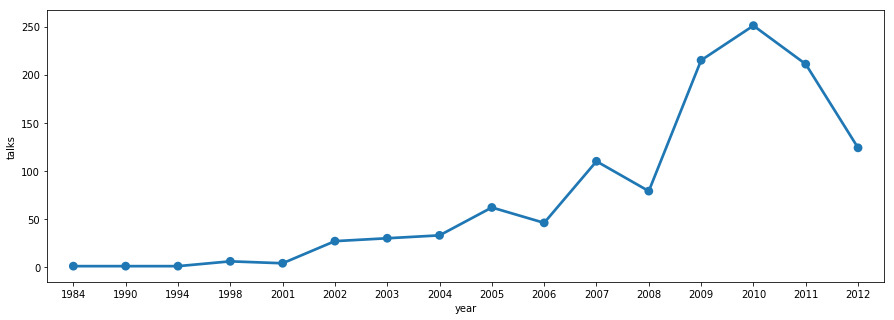

In [29]:
plt.figure(figsize=(15,5))
sns.pointplot(x='year', y='talks', data=year_df)

As can be seen above, the number of talks have gradually increased from close to **0 in 1984 to almost 250 in 2010.** This clearly suggests an upward trend and the rise in popularity of such talks. (Note that the smaller numbers in 2012 is partially due to the fact that this data was scraped in September 2012 and a considerable chunk of the talks that took place that year hadn't been uploaded or taken place at that time).

Finally, to put it all together, let us construct a heat map that shows us the number of talks by month and year. This will give us a good summary of the distribution of talks.

In [79]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [122]:
hmap_df = pd.pivot_table(theme_df[['publish_date', 'theme']], index=['publish_date'], aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['publish_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['publish_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'theme']]
hmap_df = hmap_df.pivot('month_num', 'year', 'theme')
hmap_df = hmap_df.fillna(0)
hmap_df

year,2006,2007,2008,2009,2010,2011,2012
month_num,,,,,,,
1,0.0,71.0,88.0,113.0,87.0,112.0,70.0
2,0.0,41.0,90.0,113.0,91.0,74.0,97.0
3,0.0,0.0,74.0,140.0,117.0,77.0,80.0
4,0.0,296.0,87.0,137.0,112.0,102.0,75.0
5,0.0,91.0,91.0,124.0,103.0,108.0,95.0
6,49.0,54.0,96.0,112.0,130.0,113.0,116.0
7,60.0,79.0,142.0,85.0,103.0,86.0,125.0
8,79.0,53.0,59.0,62.0,67.0,79.0,67.0
9,68.0,55.0,129.0,119.0,123.0,94.0,40.0


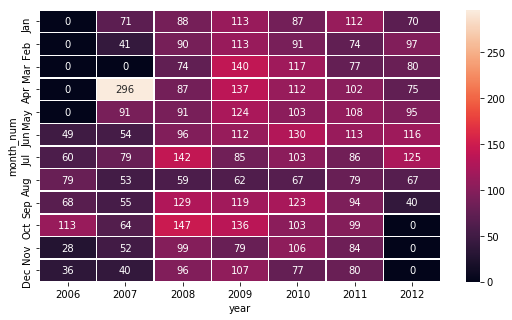

In [123]:
f, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

### Speakers

In this section, we will attempt at finding the most frequent TED Speakers. We will deal with the popularity of TED Speakers while dealing with views.

In [30]:
speaker_df = df2.groupby('speaker').count().reset_index()[['speaker', 'comments']]
speaker_df.columns = ['speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,speaker,appearances
374,Hans Rosling,9
5,Rives,5
411,Jacqueline Novogratz,5
208,Dan Dennett,4
190,Clay Shirky,4
516,Juan Enriquez,4
499,Jonathan Drori,4
903,Stefan Sagmeister,4
328,Eve Ensler,4
605,Marco Tempest,4


**Hans Rosling**, the Swiss Health Professor is clearly the most popular TED Speaker, with more than **9 appearances** on the TED Forum. **Rives** and **Jacqueline Novogratz** come at a distant second with **5 appearances** each.

### TED Events

Which TED Events tend to hold the most number of TED.com upload worthy events? We will try to answer that question in this section.

In [31]:
events_df = df2[['id', 'ted_event']].groupby('ted_event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
27,TED2009,80
29,TED2011,69
28,TED2010,68
25,TED2007,68
40,TEDGlobal 2011,67
38,TEDGlobal 2009,62
30,TED2012,60
26,TED2008,55
39,TEDGlobal 2010,54
24,TED2006,42


As expected, the official TED events held the major share of TED Talks published on the TED.com platform. There isn't too much insight to be gained from this. 

### Talk Lengths

Are the number of words in your speech correlated to the popularity of your talk (the number of views gained). Let us try to answer this question in this section. 

To do this, we require the word count of the transcript. We will obtain this in an extremely naive way by splitting the transcript string into a list and then counting the number of elements in that list. For our use case, this method should suffice.

In [32]:
df2['wc'] = df2['transcript'].apply(lambda x: len(x.split()))
df2['wc'].describe()

count    1203.000000
mean     2235.369077
std      1080.984956
min         3.000000
25%      1328.500000
50%      2378.000000
75%      3003.000000
max      6501.000000
Name: wc, dtype: float64

We can see that the average TED Talk has around **2200 words** and there is a significantly large standard deviation of a **1000 words**. The shortest talk on record is just 3 words long. Let us look further into this anomaly as talks are never this short. The longest talk is more than **6500 words** in length.

In [33]:
df2[df2['wc'] == 3]

,comments,description,film_date,id,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,transcript,url,views,dis_quo,month,year,wc
156,78,Kenichi Ebina moves his body in a manner that ...,Mar 2007,156,Oct 2007,"[Arts, Culture, Dance, Entertainment, Short talk]","[Spectacular Performance, The Creative Spark, ...","[Michael Moschen juggles rhythm and motion, Ne...",Kenichi Ebina,TED2007,Kenichi Ebina's magic moves,(Applause) (Music) (Applause),http://www.ted.com/talks/kenichi_ebina_s_magic...,769665,0.000101,Mar,2007,3


As can be seen above, this person does not actually speak in the entire duration of his presentation. So, the shortest TED Talk is actually **0 words long!**.

Let us now plot the distribution of word counts versus views and check if there is a statistically significant correlation.

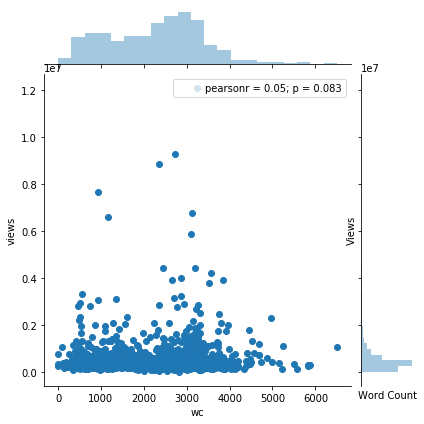

In [34]:
sns.jointplot(x='wc', y='views', data=df2)
plt.xlabel('Word Count')
plt.ylabel('Views')

In [35]:
df2[['views', 'wc']].corr()

,views,wc
views,1.000000,0.049944
wc,0.049944,1.000000


There seems to be almost no correlation between these two quantities. This strongly suggests that **there is no tangible correlation between the length and the popularity of a TED Talk**.

### Views and Popularity

With the TED User dataset, we had already discovered the most favorited TED Talks. In this section, we will try to do a vert similar thing albeit using the number of views as the metric. We will then try to see if the most favorited talks are also the most watched.

In [36]:
pop = df2[['title', 'views']].sort_values('views', ascending=False).head(25)
pop

,title,views
37,Ken Robinson says schools kill creativity,12056699
255,Jill Bolte Taylor's stroke of insight,9292536
563,Pranav Mistry: The thrilling potential of Sixt...,8838147
192,David Gallo: Underwater astonishments,7646653
658,Simon Sinek: How great leaders inspire action,6782102
411,Pattie Maes and Pranav Mistry demo SixthSense,6586517
809,Brené Brown: The power of vulnerability,5873180
182,"Arthur Benjamin does ""Mathemagic""",4443141
21,Hans Rosling: Stats that reshape your worldview,4430288
401,Elizabeth Gilbert: Your elusive creative genius,4195072


Comparing these talks with the most favorited ones, we find out that there is a significant overlap which confirms our hunch. We also notice that the most watched video is also the most favorited video of all time. Take a bow, Ken Robinson!

### Themes

The final question that we will try to answer in this notebook before concluding is finding out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

To answer this question, we need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

In [37]:
s = df2.apply(lambda x: pd.Series(x['related_tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [38]:
theme_df = df2.drop('related_tags', axis=1).join(s)
theme_df.head()

,comments,description,film_date,id,publish_date,related_themes,related_videos,speaker,ted_event,title,transcript,url,views,dis_quo,month,year,wc,theme
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,0.000333,May,2012,2824,Crime
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,0.000333,May,2012,2824,Global issues
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,0.000333,May,2012,2824,Government
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,0.000333,May,2012,2824,Law
0,7,Scott Fraser studies how humans remember crime...,May 2012,0,Sep 2012,[How the Mind Works],[Bryan Stevenson: We need to talk about an inj...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,0.000333,May,2012,2824,Memory


In [39]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,Technology,421
1,Culture,337
2,Science,323
3,Global issues,289
4,Design,265
5,Entertainment,217
6,Business,197
7,Arts,148
8,Politics,106
9,Education,103


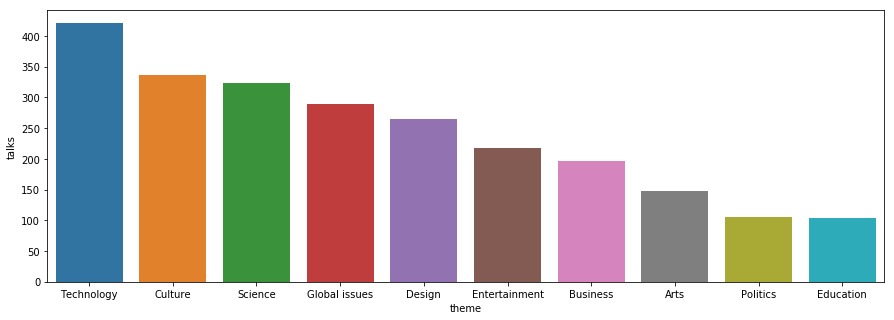

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))

As may have been expected, **Technology** is the most popular topic for talks. The other two original factions, Design and Entertainment, also make it to the list of top 10 themes. **Culture** and **Science** are the second and the third most popular themes respectively.

## Conclusions

We have gained a lot of insights from the datasets given to us. Let us summarise the most significant results in this section.

1. There are around **12,500** registered users on TED.com and they have favorited their talks close to **135,000** times, with each user favoriting close to **11 talks** on average.
2. Ken Robinson's **Do Schools Kill Creativity?** is the most favorited talk of all time.
3. Every talk has, on average, close to a **100 comments**.
4. There is an obvious correlation between the number of comments and the number of views.
5. Talks on **Faith and Religion** attract a significant amount of discussion, debates and comments. Richard Dawkins' talk on **Militant Atheism** is the most commented on talk of all time, despite having only a tenth of the views of Ken Robinson's talk.
6. **February** is the most popular month for TED Talks. **November** is the most popular month for great TEDx talks.
7. The number of TED Talks have gradually increased since its inception to about **250 talks** being uploaded from the year 2010
8. **Hans Rosling** is the most popular TED Speaker, with over **9 appearances**.
9. The longest TED Talk was about **6500 words** long. The shortest TED Talk **did not have any words** at all!
10. There is **no correlation** between the length and popularity of a TED Talk.
11. **Ken Robinson's** talk is the most viewed talk of all time too.
12. **Technology** is the most popular theme of TED Talks, followed by **Culture** and **Science**